#  Исследование результатов А/В-теста и поиск инсайтов

SollmaFin — международное мобильное приложение для онлайн-торговли финансовыми активами. Пользователи могут инвестировать деньги в акции, валюту, криптовалюту, биржевые фонды (ETF) и другие активы. Целевая аудитория приложения — начинающие инвесторы. Получить доступ к финансовым рынкам можно со смартфона либо через веб-версию. 

Приложение ориентировано на рынок Латинской Америки с акцентом на четыре страны: Мексику, Бразилию, Колумбию и Аргентину — там быстро растёт интерес к финтеху и инвестициям, а экономики очень разные. 

Появилась гипотеза о недостаточной финансовой грамотности пользователей: они не понимают, как работать с активами разной степени риска. Клиенты покупают активы с высоким риском и теряют деньги, что снижает вовлечённость.
Команда продукта решила обновить онбординг пользователей и добавить в него детальную информацию о различиях финансовых активов и связанных с ними рисках. Однако появилось опасение, что углублённый онбординг отпугнёт клиентов от пополнения депозита и более рискованных вложений. 

Чтобы разобраться, команда решила провести A/B-эксперимент. 

### А/В-эксперимент

В эксперименте участвовали новые пользователи, которые зарегистрировались в приложении **со 2 по 15 июня 2025 года**. 
Пользователей случайным образом разделили на две равные группы: 
- Контрольная группа проходила стандартный онбординг без обязательного обучения.
- Тестовая группа проходила обновлённый онбординг с подробной информацией об активах и связанных с ними рисках. 

После разделения активность пользователей анализировали в течение недели.

Цель эксперимента — оценить, как обновлённый онбординг влияет на поведение пользователей и их дальнейшую инвестиционную активность.

При внедрении новой фичи команда продукта выдвинула такие гипотезы:
- Гипотеза роста: обучающий онбординг помогает пользователям лучше понимать принципы инвестирования, поэтому они будут чаще открывать второй депозит.
- Гипотеза риска: информация о возможных потерях и высоких рисках отпугнёт некоторых новичков, особенно самых осторожных, что снизит конверсию в первый депозит.
- Дополнительная гипотеза: после нового онбординга пользователи, которые выбрали высокорискованные активы, будут чаще, чем раньше, возвращаться и открывать второй депозит. При старом онбординге пользователи часто покупали активы с высоким риском без понимания последствий. Это приводило к потерям и оттоку после первого депозита. 

Чтобы увидеть полную картину, недостаточно следить за метриками конверсии. Команда выбрала для эксперимента такой набор метрик: 
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.

Ожидалось, что ключевая и барьерная метрики не упадут, а вспомогательные покажут значительный рост. 

### Задачи аналитика

Вам предстоит провести полный анализ результатов А/В-эксперимента. Но перед этим нужно погрузиться в продукт и изучить исторические данные.    


#### 1. Анализ исторических данных

Чтобы понять, для чего была разработана новая фича, вам предстоит изучить исторические данные: 
- Поведение новых пользователей, в том числе динамику привлечения, сегментацию и ключевые этапы воронки действий.
- Метрики, связанные с внесением депозитов, в том числе средние суммы депозитов. 

#### 2. Анализ данных А/В-теста

Изучение результатов эксперимента будет состоять из двух этапов: 
- Сравнение поведения пользователей в контрольной и тестовой группах, оценка статистической значимости изменений. 
- Исследование влияния нового онбординга на поведение платящих пользователей. В исследовании вы будете использовать бутстрап и сосредоточитесь на нижних и верхних перцентилях распределения депозитов. 
- Такой подход позволит понять, как обновлённый онбординг повлиял на ключевые бизнес-метрики, найти точки роста и сформулировать рекомендации по улучшению пользовательского опыта и монетизации.


#### Данные

Вы будете работать с двумя датасетами:  

1. Датасет `/datasets/pa_sollmafin_hist.csv` содержит исторические данные о ключевых действиях новых пользователей, привлечённых в период **с 1 апреля по 1 июня 2025 года включительно**. В датасете собраны действия пользователей до оформления второго депозита. 
2. Датасет `/datasets/pa_sollmafin_abt.csv` содержит данные А/В-эксперимента — все действия новых пользователей, которые **зарегистрировались со 2 по 15 июня 2025 года включительно**. Данные собраны в рамках проверки гипотезы о влиянии нового онбординга на поведение и активность пользователей. Пользователи уже распределены по группам А/В-эксперимента.

Общие поля датасетов:
- `user_id` — уникальный идентификатор пользователя;
- `country_code` — код страны пользователя в формате ISO (например, `BR` — Бразилия, `MX` — Мексика, `AR` — Аргентина, `CO` — Колумбия);
- `platform` — устройство, с которого пользователь взаимодействует с продуктом: mobile или web;
- `first_ts` — время первого появления пользователя в системе;
- `first_dt` — дата первого появления пользователя (без времени);
- `event_ts` — время события;
- `event_name` — название события;
- `amount` — сумма пополнения депозита;
- `asset` — тип приобретённого актива; 
- `risk_level` — уровень риска актива: low — низкий риск, medium — средний риск, high — высокий риск.

В датасете `/datasets/pa_sollmafin_abt.csv` содержатся два дополнительных поля:
- `ab_test` — название А/В-эксперимента;
- `group` — пользовательская группа А/В-эксперимента.


#### План проекта
1. Загрузка исторических данных и их предобработка
2. Исследовательский анализ исторических данных
3. Исследование результатов А/В эксперимента
4. Анализ изменений суммы депозитов на платящего пользователя
5. Выводы

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее введение в проект - пригодится в будущем, когда соберешь большое портфолио и откроешь проект вновь👍

</div>


In [1]:
pip install matplotlib==3.8.4 numpy==1.22.4 pandas==2.0.3

     |████████████████████████████████| 11.6 MB 2.4 MB/s eta 0:00:01    |██████████████▊                 | 5.4 MB 1.8 MB/s eta 0:00:04     |███████████████▍                | 5.6 MB 1.8 MB/s eta 0:00:04     |█████████████████████████████▍  | 10.7 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 897 kB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 304 kB 15.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    

In [104]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import seaborn as sns

---

## Часть 1

### 1. Загрузка исторических данных и их предобработка

Загрузите данные из датасета `/datasets/pa_sollmafin_hist.csv` и получите основную информацию о них. Проведите предобработку. Зафиксируйте основную информацию о данных и предобработке в кратком промежуточном выводе.

In [3]:
df = pd.read_csv('https://code.s3.yandex.net//datasets/pa_sollmafin_hist.csv', parse_dates=['first_ts', 'event_ts', 'first_dt'])

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Здорово, что сразу парсишь даты👍

</div>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238059 entries, 0 to 238058
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       238059 non-null  object        
 1   country_code  238059 non-null  object        
 2   platform      238059 non-null  object        
 3   first_ts      238059 non-null  datetime64[ns]
 4   first_dt      238059 non-null  datetime64[ns]
 5   event_ts      238059 non-null  datetime64[ns]
 6   event_name    238059 non-null  object        
 7   amount        33093 non-null   float64       
 8   asset         15392 non-null   object        
 9   risk_level    15392 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 18.2+ MB


In [5]:
df.isna().mean()

user_id         0.000000
country_code    0.000000
platform        0.000000
first_ts        0.000000
first_dt        0.000000
event_ts        0.000000
event_name      0.000000
amount          0.860988
asset           0.935344
risk_level      0.935344
dtype: float64

In [6]:
df.head()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,amount,asset,risk_level
0,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:51,install / open_web,NaN,NaN,NaN
1,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:59,introduction,NaN,NaN,NaN
2,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:06,registration,NaN,NaN,NaN
3,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:15,main_page,NaN,NaN,NaN
4,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:47:59,onboarding_complete,NaN,NaN,NaN


In [7]:
df.first_dt.min(), df.first_dt.max()

(Timestamp('2025-04-01 00:00:00'), Timestamp('2025-06-01 00:00:00'))

In [8]:
df.event_ts.min(), df.event_ts.max()

(Timestamp('2025-04-01 00:06:34'), Timestamp('2025-06-09 20:24:42'))

In [9]:
df.duplicated().sum()

0

In [10]:
df[['user_id', 'event_ts', 'event_name']].duplicated().sum()

0

In [11]:
df.user_id.nunique()

41032

In [12]:
df.groupby('country_code').user_id.nunique()

country_code
AR     7489
BR    12266
CO     9974
MX    11303
Name: user_id, dtype: int64

In [13]:
df.event_name.unique()

array(['install / open_web', 'introduction', 'registration', 'main_page',
       'onboarding_complete', 'first_deposit', 'asset_purchase',
       'second_deposit'], dtype=object)

В датасете 238059 строк, 10 столбцов. Данные событий представлены за период с 1 апреля 2025 по 9 июня 2025 года. Это события, совершенные пользователями, привлеченными с 1 апреля по 1 июня 2025. Упомянуты 41 032 уникальных пользователя.

Больше всего пользователей в данных из Бразилии (12 226) и Мексики (11 303), из Колумбии – 9974, из Аргентины - 7489.

Явных дубликатов и скрытых дубликатов по полям `user_id`, `event_ts`, `event_name` нет.

Пропуски содержатся в полях `amount` (86%), `asset` (94%), `risk_level` (94%). Они обусловлены структурой данных, где не для каждого event_name необходимо заполнение этих полей. Учтем это в работе с данными, дополнительная обработка пропусков не требуется.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Очень хорошо, что не забываешь проверять данные на наличие пропусков и дубликатов.  Молодец, что приводишь даты к нужному формату - предобработка проведена отлично.

</div>

---

### 2. Исследовательский анализ исторических данных

Проведите исследовательский анализ исторических данных. По каждой подзадаче сделайте промежуточный вывод. 

#### **Задача 2.1.** Анализ новых пользователей.
- Изучите динамику привлечения новых пользователей в приложение.

Среди евентов юзеров первым является `install / open_web`. Убедимся, что этот лог совершается пользователем единожды.

In [14]:
df[df.event_name == 'install / open_web'].groupby(['user_id']).event_name.nunique().max()

1

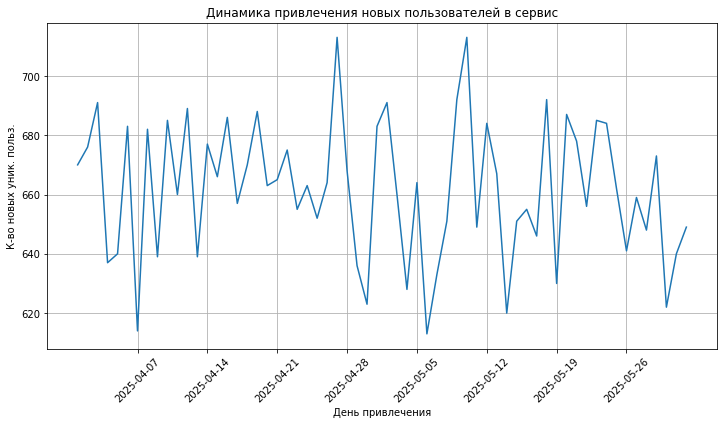

In [15]:
first_touch = df[df.event_name == 'install / open_web'].groupby('first_dt').user_id.nunique().reset_index()

legend = [x for x in first_touch.first_dt.unique() if pd.to_datetime(x).weekday() in [0]]

plt.figure(figsize=(12,6))

plt.plot(first_touch.first_dt, first_touch.user_id)

plt.title('Динамика привлечения новых пользователей в сервис')
plt.xlabel('День привлечения')
plt.ylabel('К-во новых уник. польз.')
plt.xticks(ticks=legend, rotation=45)
plt.grid()

plt.show()

In [16]:
first_touch.user_id.min()

613

In [17]:
first_touch.user_id.max()

713

In [18]:
first_touch.user_id.median()

663.0

In [19]:
first_touch.user_id.mean()

661.8064516129032

In [99]:
first_touch['roll'] = first_touch.user_id.rolling(window=7).mean()

first_touch.head(10)

,first_dt,user_id,roolling,rolling,roll
0,2025-04-01,670,NaN,NaN,NaN
1,2025-04-02,676,NaN,NaN,NaN
2,2025-04-03,691,NaN,NaN,NaN
3,2025-04-04,637,NaN,NaN,NaN
4,2025-04-05,640,NaN,NaN,NaN
5,2025-04-06,683,NaN,NaN,NaN
6,2025-04-07,614,658.714286,658.714286,658.714286
7,2025-04-08,682,660.428571,660.428571,660.428571
8,2025-04-09,639,655.142857,655.142857,655.142857
9,2025-04-10,685,654.285714,654.285714,654.285714


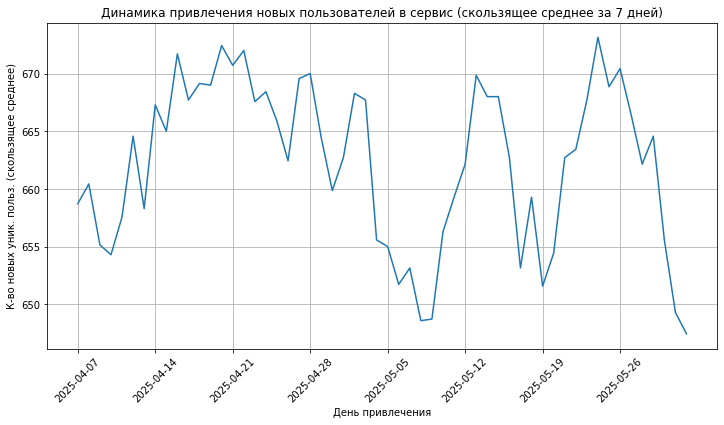

In [101]:
legend = [x for x in first_touch.first_dt.unique() if pd.to_datetime(x).weekday() in [0]]

plt.figure(figsize=(12,6))

plt.plot(first_touch.first_dt[6:], first_touch.roll[6:])

plt.title('Динамика привлечения новых пользователей в сервис (скользящее среднее за 7 дней)')
plt.xlabel('День привлечения')
plt.ylabel('К-во новых уник. польз. (скользящее среднее)')
plt.xticks(ticks=legend, rotation=45)
plt.grid()

plt.show()

За период наблюдения исторических данных метрика количества привлеченных в день пользователей нестабильна в разной степени: до конца апреля 2025 график более сглаженный, после - с двумя выраженными циклами примерно по 2 недели.

Значения варьируют от 613 до 713 уник. польз. в день, в среднем привлекалось 662 пользователя в день.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Чтобы лучше понять общую картину, при анализе данных удобно также использовать скользящее среднее. Оно сгладит резкие колебания и поможет увидеть, как меняется количество новых пользователей в целом, без резких провалов и пиков. Для `pandas` удобно использовать метод `rolling.mean()` : https://habr.com/ru/articles/494636/ `На столько ли привлечение нестабильно?` А еще можно поразмышлять, нет ли в динамике привлечения недельной цикличности?

</div>


#### **Задача 2.2.** Анализ воронок событий.
- Постройте классическую и пошаговую воронки;
- Охарактеризуйте пользовательский путь в приложении и определите узкие места воронки. 


In [20]:
fun = df.groupby('event_name').user_id.nunique().reset_index()
fun = fun.sort_values(by='user_id', ascending=False)

fun['conv'] = round(100 *  fun.user_id / fun.user_id.iloc[0], 2)
fun['conv_from_prev'] = round(100 * fun.user_id / fun.user_id.shift(1), 2)
fun

,event_name,user_id,conv,conv_from_prev
2,install / open_web,41032,100.00,NaN
3,introduction,41032,100.00,100.00
6,registration,38133,92.93,92.93
4,main_page,35040,85.40,91.89
5,onboarding_complete,34337,83.68,97.99
1,first_deposit,27685,67.47,80.63
0,asset_purchase,15392,37.51,55.60
7,second_deposit,5408,13.18,35.14


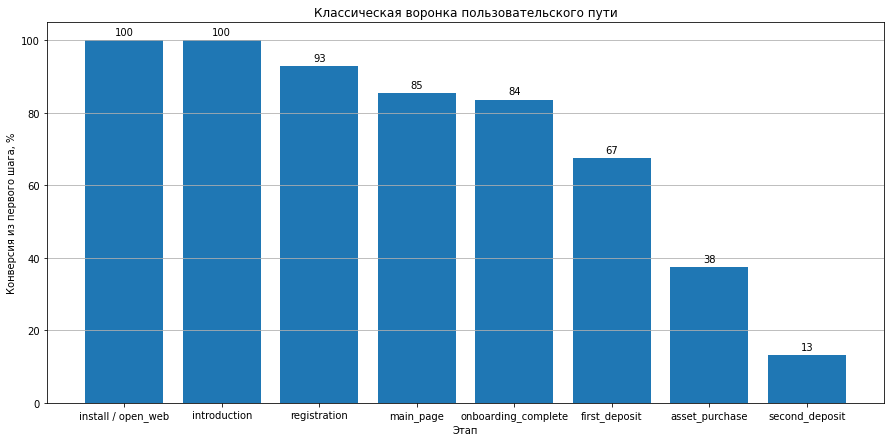

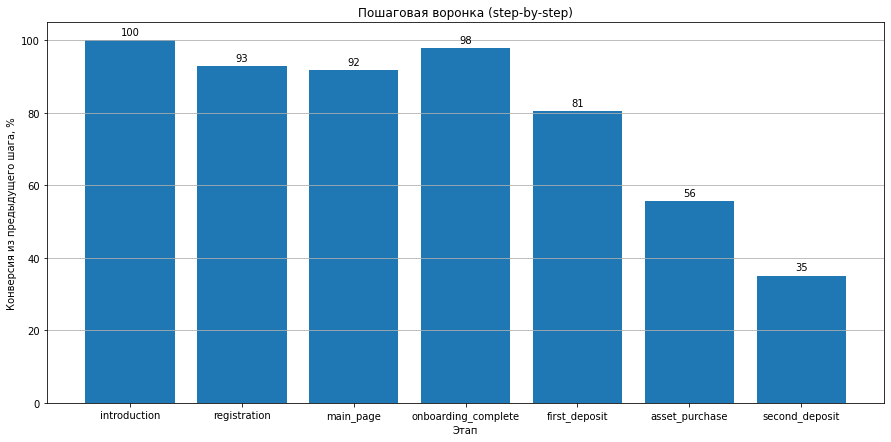

In [21]:
plt.figure(figsize=(15,7))

bars = plt.bar(fun.event_name, fun.conv)
plt.title('Классическая воронка пользовательского пути')
plt.xlabel('Этап')
plt.ylabel('Конверсия из первого шага, %')
plt.grid(axis='y')
plt.bar_label(bars, fmt='%.0f', padding=3)
plt.show()


plt.figure(figsize=(15,7))
bars = plt.bar(fun.event_name, fun.conv_from_prev)
plt.title('Пошаговая воронка (step-by-step)')
plt.xlabel('Этап')
plt.ylabel('Конверсия из предыдущего шага, %')
plt.grid(axis='y')
plt.bar_label(bars, fmt='%.0f', padding=3)

plt.show()

**Если возникает ошибка атрибута, пожалуйста, перезагрузите ядро.**

На исторических данных конверсия из первого посещения в первый депозит - 67%, во второй - только 13%. Совершают покупки активов 38% пришедших пользователей.

Онбординг завершает 84% пришедших пользователей. После онбординга видим точки оттока пользователей:

На диаграмме конверсии из предыдущего шага видно, что явный отток пользователей просиходит на этапах открытия первого депозита (81% завершивших онбординг), второго депозита и покупки активов. 


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Действительно, несмотря на хорошие показатели внесения первого депозита (почти 70% пользователей - это реально неплохо), очень большая часть теряется именно на этапе выбора первого актива, что может быть связано с рядом факторов - это определенно момент для исследования, ровно как и причина огромного разрыва на шаге внесения второго депозита. 👀

</div>


#### **Задача 2.3.** Влияние уровня риска актива на открытие второго депозита.
- Изучите, как уровень риска первого актива влияет на конверсию во второй депозит.  

In [22]:
risks = df.groupby(['risk_level', 'event_name']).user_id.nunique().reset_index()

risks

,risk_level,event_name,user_id
0,high,asset_purchase,7740
1,low,asset_purchase,2327
2,medium,asset_purchase,5325


In [23]:
df[df.user_id == '9d4a2291-a0a1-4b3d-8c34-ed8603f448be']

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,amount,asset,risk_level
184228,9d4a2291-a0a1-4b3d-8c34-ed8603f448be,AR,mobile,2025-05-18 10:22:17,2025-05-18,2025-05-18 10:22:17,install / open_web,NaN,NaN,NaN
184229,9d4a2291-a0a1-4b3d-8c34-ed8603f448be,AR,mobile,2025-05-18 10:22:17,2025-05-18,2025-05-18 10:22:19,introduction,NaN,NaN,NaN
184230,9d4a2291-a0a1-4b3d-8c34-ed8603f448be,AR,mobile,2025-05-18 10:22:17,2025-05-18,2025-05-18 20:20:04,registration,NaN,NaN,NaN
184231,9d4a2291-a0a1-4b3d-8c34-ed8603f448be,AR,mobile,2025-05-18 10:22:17,2025-05-18,2025-05-18 20:20:11,main_page,NaN,NaN,NaN
184232,9d4a2291-a0a1-4b3d-8c34-ed8603f448be,AR,mobile,2025-05-18 10:22:17,2025-05-18,2025-05-18 20:21:51,onboarding_complete,NaN,NaN,NaN
184233,9d4a2291-a0a1-4b3d-8c34-ed8603f448be,AR,mobile,2025-05-18 10:22:17,2025-05-18,2025-05-19 08:58:21,first_deposit,76.0,NaN,NaN
184234,9d4a2291-a0a1-4b3d-8c34-ed8603f448be,AR,mobile,2025-05-18 10:22:17,2025-05-18,2025-05-19 17:08:07,asset_purchase,NaN,crypto,medium
184235,9d4a2291-a0a1-4b3d-8c34-ed8603f448be,AR,mobile,2025-05-18 10:22:17,2025-05-18,2025-05-20 02:49:54,second_deposit,157.0,NaN,NaN


In [24]:
first_risk = df[df.event_name == 'asset_purchase'][['user_id', 'risk_level']]

first_risk.head()

,user_id,risk_level
12,89923614-c303-414d-9788-b5ed77ccc740,medium
19,df7b9aae-7475-4878-a8c7-9bd3002fa226,high
26,f18e66dc-e9dd-4608-b067-716ec62f4e70,low
39,f1d9c60f-3365-4d6b-967a-099098b5efc9,high
51,56765f29-e127-402d-b45a-96427b6c37d2,high


In [25]:
counts = df[df.event_name.isin(['first_deposit', 'second_deposit'])]
counts = pd.merge(counts[['user_id', 'event_name']], first_risk, how='left', on='user_id')

sec_dep_conv = counts.groupby(['risk_level', 'event_name']).size().unstack()
sec_dep_conv['conv'] = sec_dep_conv.second_deposit / sec_dep_conv.first_deposit * 100

sec_dep_conv

event_name,first_deposit,second_deposit,conv
risk_level,,,
high,7740,2040,26.356589
low,2327,1080,46.411689
medium,5325,2288,42.967136


Чаще всего пользователи покупают активы с высоким риском (7740 пок.), такие пользователи только в 26% открывают второй депозит.

Совершено 5325 покупок средне-рискованных активов с конверсией во второй депозит 43%.

Реже всего впервые покупают активы с низким риском (2327 пок.), при этом затем чаще всего открывают второй депозит – в 46% случаев.

Чем выше риск активов первого депозита, тем реже пользователи открывают второй. Пользователей с таким путем больше остальных. Чем ниже риск – тем выше конверсия в открытие второго депозита.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, согласен, чем ниже риск первого депозита, тем выше конверсия во второй депозит. Это может быть связано с тем, что пользователи, выбирающие менее рискованные активы, чувствуют себя увереннее и с большей вероятностью продолжают инвестировать. А может быть, более рискованные активы требуют большей осознанности - без необходимости повторных покупок.

</div>


#### **Задача 2.4.** Анализ ключевой метрики на исторических данных.
- На исторических данных рассчитайте значение ключевой метрики — средней суммы всех депозитов на одного пользователя. Учитывайте всех пользователей, которые взаимодействовали с сервисом. Это позволит зафиксировать базовый уровень монетизации.
- Визуализируйте данные, где необходимо. По результатам исследовательского анализа сделайте краткий вывод. 

In [26]:
mean_deposit_amount = df.amount.sum() / df.user_id.nunique()

mean_deposit_amount

91.5622197309417

In [27]:
users_amounts = df.groupby('user_id').amount.sum().reset_index()

users_amounts.head()

,user_id,amount
0,000194d5-0b25-4c52-834d-7c812daded6a,72.0
1,000230df-cb80-4a99-9eb4-6e7b559cbd0a,103.0
2,00031d01-a2cc-4e28-be64-84c652318cf9,316.0
3,00039a87-007c-4aea-aa7a-f0307022ae6c,123.0
4,00044258-420d-40a2-8cfe-039c6c9deffd,128.0


In [28]:
users_amounts.describe()

,amount
count,41032.000000
mean,91.562220
std,80.393251
min,0.000000
25%,0.000000
50%,96.000000
75%,133.000000
max,656.000000


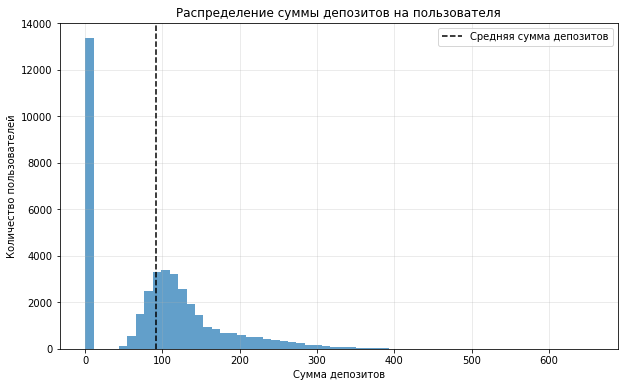

In [29]:
plt.figure(figsize=(10, 6))

plt.hist(users_amounts.amount, bins=60, alpha=0.7)

plt.title("Распределение суммы депозитов на пользователя")
plt.xlabel("Сумма депозитов")
plt.ylabel("Количество пользователей")
plt.grid(True, alpha=0.3)
plt.axvline(x=mean_deposit_amount, color='black', label='Средняя сумма депозитов', linestyle='--')
plt.legend()

plt.show()

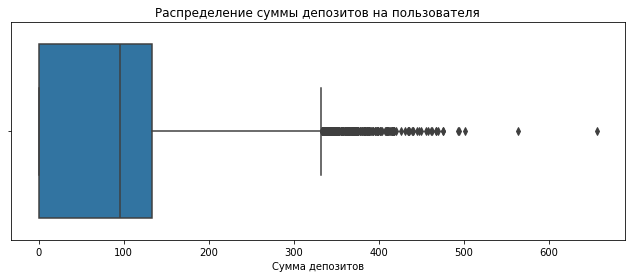

In [30]:
plt.figure(figsize=(11, 4))

sns.boxplot(x=users_amounts['amount'])
plt.title("Распределение суммы депозитов на пользователя")
plt.xlabel("Сумма депозитов")

plt.show()

На исторических данных средняя сумма депозитей на пользователя составляет 91 у.е, что близко к медианному значению - 96.

У распределения суммы депозитов наблюдается тяжелый правый хвост (до 656), с 75 процентилем 133 у.е.

Мода - депозиты с нулевым балансом.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Согласен👍 Такое распределение - типичное явление для финансовых данных пользователей. Большая часть не делает вложений, поэтому суммы равны нулю, а среди инвесторов встречаются те, кто вкладывает редко, но очень крупные суммы. Из-за этого данные получаются сильно скошенными, и это важно учитывать при анализе.

</div>


---

## Часть 2

### 3. Исследование результатов А/В эксперимента
Загрузите данные с результатами эксперимента (датасет `/datasets/pa_sollmafin_abt.csv `). Проверьте корректность данных и проведите предобработку. Зафиксируйте основную информацию о данных и предобработке в кратком промежуточном выводе.
Затем проведите анализ результатов А/В-эксперимента.


In [31]:
ab = pd.read_csv('https://code.s3.yandex.net/datasets/pa_sollmafin_abt.csv', parse_dates=['first_ts', 'event_ts', 'first_dt'])

ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54805 entries, 0 to 54804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       54805 non-null  object        
 1   country_code  54805 non-null  object        
 2   platform      54805 non-null  object        
 3   first_ts      54805 non-null  datetime64[ns]
 4   first_dt      54805 non-null  datetime64[ns]
 5   event_ts      54805 non-null  datetime64[ns]
 6   event_name    54805 non-null  object        
 7   ab_test       54805 non-null  object        
 8   group         54805 non-null  object        
 9   amount        7843 non-null   float64       
 10  asset         3750 non-null   object        
 11  risk_level    3750 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 5.0+ MB


In [32]:
ab.isna().mean()


user_id         0.000000
country_code    0.000000
platform        0.000000
first_ts        0.000000
first_dt        0.000000
event_ts        0.000000
event_name      0.000000
ab_test         0.000000
group           0.000000
amount          0.856893
asset           0.931576
risk_level      0.931576
dtype: float64

In [33]:
ab.head()


,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,ab_test,group,amount,asset,risk_level
0,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:51,install / open_web,onboarding_test,test,NaN,NaN,NaN
1,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:54,introduction,onboarding_test,test,NaN,NaN,NaN
2,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:09,registration,onboarding_test,test,NaN,NaN,NaN
3,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:13,main_page,onboarding_test,test,NaN,NaN,NaN
4,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:33:40,onboarding_complete,onboarding_test,test,NaN,NaN,NaN


In [34]:
ab.event_ts.max()

Timestamp('2025-06-22 13:37:05')

In [35]:
ab.event_ts.min()

Timestamp('2025-06-02 00:27:50')

In [36]:
ab.first_ts.dt.date.min()

datetime.date(2025, 6, 2)

In [37]:
ab.first_ts.dt.date.max()

datetime.date(2025, 6, 15)

In [38]:
ab[ab.event_name == 'registration'].event_ts.dt.date.min()

datetime.date(2025, 6, 2)

In [39]:
ab[ab.event_name == 'registration'].event_ts.dt.date.max()

datetime.date(2025, 6, 16)

In [40]:
ab.duplicated().sum()

0

In [41]:
ab[['user_id', 'event_ts', 'event_name']].duplicated().sum()


0

Экспериментальные данные представлены для пользователей, пришедших со 2 по 15 июня 2025 включительно, евенты совершались со 2 по 22 июня 2025 года.

В датасете 54805 строк, 11 столбцов.

Пропуски встречаются в аналогичных столбцах `amount` (86%), `asset` (93%), `risk_level` (93%). Они обусловлены структорой логов и не требуют дополнительной обработки.

Явных и неявных дубликатов не обнаружено.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   В целом, по данным все хорошо👍
</div>


#### **Задача 3.1.** Анализ аудитории эксперимента. 
- Проверьте корректность распределения новых пользователей по группам А/В-эксперимента. 
- Постройте графики и сформулируйте промежуточный вывод. 

In [42]:
ab.ab_test.unique()

array(['onboarding_test'], dtype=object)

In [43]:
ab.group.unique()

array(['test', 'control'], dtype=object)

In [44]:
# ВОТ ТУТ УБЕЖДАЕМСЯ, ЧТО НЕТ ПОЛЬЗОВАТЕЛЕЙ С ПРИНАДЛЕЖНОСТЬЮ БОЛЬШЕ, ЧЕМ К ОДНОЙ ГРУППЕ

user_group = ab[['user_id', 'group']]

user_group = user_group.groupby('user_id').group.nunique().reset_index()

user_group[user_group.group > 1].user_id.count()

0

In [45]:
dest = ab[ab.event_name == 'install / open_web'].group.value_counts().reset_index()

dest['percent'] = (dest['count'] / dest['count'].sum()) * 100

dest

,group,count,percent
0,control,4847,51.481678
1,test,4568,48.518322


In [46]:
ab.first_dt.min()

Timestamp('2025-06-02 00:00:00')

In [47]:
ab.first_dt.max()

Timestamp('2025-06-15 00:00:00')

In [48]:
ab.user_id.nunique()

9415

In [49]:
reg = ab[ab.event_name == 'registration']

test_reg = (reg[reg.group == 'test'].groupby(reg[reg.group == 'test'].event_ts.dt.date).user_id.nunique()).reset_index()

control_reg = (reg[reg.group == 'control'].groupby(reg[reg.group == 'control'].event_ts.dt.date).user_id.nunique()).reset_index()

test_reg

,event_ts,user_id
0,2025-06-02,230
1,2025-06-03,319
2,2025-06-04,296
3,2025-06-05,307
4,2025-06-06,311
5,2025-06-07,280
6,2025-06-08,323
7,2025-06-09,301
8,2025-06-10,299
9,2025-06-11,304


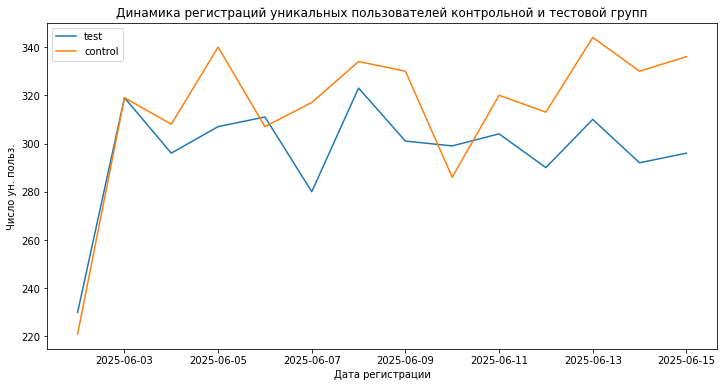

In [50]:
plt.figure(figsize=(12, 6))

plt.plot(test_reg.event_ts[:-1], test_reg.user_id[:-1], label='test')
plt.plot(control_reg.event_ts[:-1], control_reg.user_id[:-1], label='control')

plt.title('Динамика регистраций уникальных пользователей контрольной и тестовой групп')
plt.xlabel('Дата регистрации')
plt.ylabel('Число ун. польз.')

plt.legend()
plt.show()

В данных представлены логи только для нужного теста `onbording_test`, для двух тестовых групп: `test`, `control`.

Всего совершали действия 9415 пользователей: 51,48% (4847 ун. п.) из контрольной группы, 48,52% (5468 ун. п.) из тестовой группы. Пересечений групп не обнаружено.

Пользователи в обеих группах набирались в общем корректно, хотя прослеживается небольшое опережение контрольной группой по числу регистраций на протяжении теста.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Также стоит проверить, что каждый пользователь принадлежит только одной группе (между группами нет пересечений)

</div>


<div class="alert alert-block alert-info">
    Конечно, мы в этом убедились в ячейке 44.
</div>

#### **Задача 3.2.** Сравнение воронок событий.
- Сравните пользовательский путь новых пользователей в тестовой и контрольной группах.
- Постройте классическую и последовательную воронки, выполните визуализацию и сделайте промежуточный вывод. 

In [51]:
steps = ['install / open_web', 'introduction', 'registration', 'main_page',
       'onboarding_complete', 'first_deposit', 'asset_purchase',
       'second_deposit']

In [52]:
test = ab[ab.group == 'test']
control = ab[ab.group == 'control']

counts_test = test.groupby('event_name').user_id.nunique().reindex(steps)
counts_control = control.groupby('event_name').user_id.nunique().reindex(steps)

test_funnel = round(100 * counts_test / counts_test.shift(1), 2)
control_funnel = round(100 * counts_control / counts_control.shift(1), 2)

funnel_groups = pd.DataFrame({
    'step': steps[1:],
    'test': test_funnel[1:].values,
    'control': control_funnel[1:].values
})

funnel_groups

,step,test,control
0,introduction,100.00,100.00
1,registration,93.37,93.09
2,main_page,91.89,92.22
3,onboarding_complete,88.34,97.64
4,first_deposit,86.28,79.45
5,asset_purchase,66.19,54.93
6,second_deposit,49.27,36.89


In [53]:
test_funn = round(100 * counts_test / counts_test.iloc[0], 2)
control_funn = round(100 * counts_control / counts_control.iloc[0], 2)

funnel_strait = pd.DataFrame({
    'step': steps,
    'test': test_funn.values,
    'control': control_funn.values
})

funnel_strait

,step,test,control
0,install / open_web,100.00,100.00
1,introduction,100.00,100.00
2,registration,93.37,93.09
3,main_page,85.79,85.85
4,onboarding_complete,75.79,83.83
5,first_deposit,65.39,66.60
6,asset_purchase,43.28,36.58
7,second_deposit,21.32,13.49


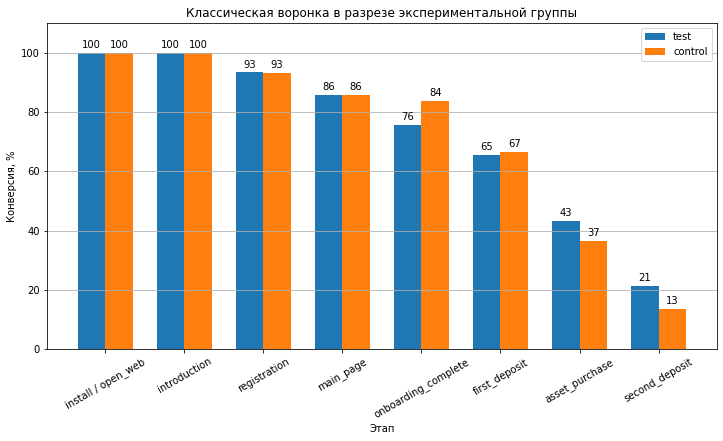

In [54]:
plt.figure(figsize=(12,6))
x = np.arange(len(funnel_strait.step))
width = 0.35
bars_test = plt.bar(x - width/2, funnel_strait.test, width, label='test')
bars_control = plt.bar(x + width/2, funnel_strait.control, width, label='control')

plt.title('Классическая воронка в разрезе экспериментальной группы')
plt.xlabel('Этап')
plt.ylabel('Конверсия, %')
plt.xticks(x, funnel_strait.step, rotation=30)

plt.bar_label(bars_test, fmt='%.0f', padding=3)
plt.bar_label(bars_control, fmt='%.0f', padding=3)

plt.grid(axis='y')
plt.ylim(0, 110)
plt.legend()
plt.show()

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Отличная визуализация👍 Мы явно видим улучшение на этапах покупки актива и внесения второго депозита, при этом низилась конверсия в успешный онбординг

</div>


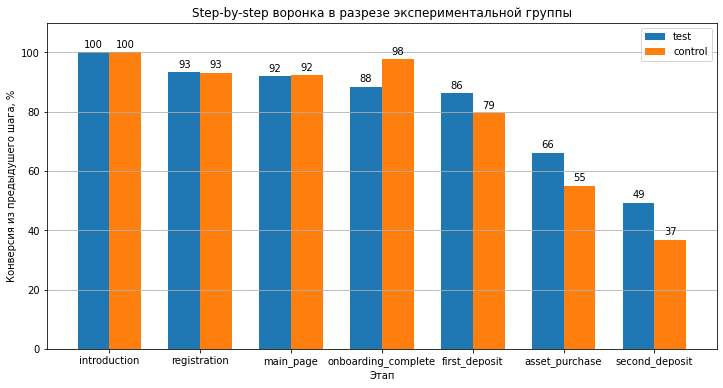

In [55]:
plt.figure(figsize=(12,6))
x = np.arange(len(funnel_groups.step))
width = 0.35
bars_test = plt.bar(x - width/2, funnel_groups.test, width, label='test')
bars_control = plt.bar(x + width/2, funnel_groups.control, width, label='control')

plt.title('Step-by-step воронка в разрезе экспериментальной группы')
plt.xlabel('Этап')
plt.ylabel('Конверсия из предыдушего шага, %')
plt.xticks(x, funnel_groups.step)

plt.bar_label(bars_test, fmt='%.0f', padding=3)
plt.bar_label(bars_control, fmt='%.0f', padding=3)

plt.grid(axis='y')
plt.ylim(0, 110)
plt.legend()
plt.show()

Как и ожидалось, в тестовой и контрольной группах наблюдаются различия конверсий, начиная с этапа онбординга: в тестовой группе завершают онбординг реже, чем в контроле. 

Общая конверсия в `onbording_complete` 
- в тесте - 76% от пришедших в сервис, 
- в контроле - 84%; 

конверсия из предыдущего этапа
- в тесте - 88%
- в контроле - 98%.

Первый депозит открывают чаще в контрольной группе (67% пришедших), в тесте реже (65%). А вот совершает покупки активов и открывает второй депозит больший процент пришедших в сервис в тестовой группе (43% против 37%, 21% против 13%).

На диаграмме конверсии из предыдущего шага также видно, что удерживаются пользователи из этапа в этап эффективнее именно в тестовой группе. Стратегия в контрольной группе более эффективна только на этапе завершения онбординга. Обновленный онбординг прошли в среднем более вовлеченные пользователи.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, при переходе с предыдущего шага и здесь заметны изменения в конверсии. Однако важно учитывать, как они распределяются в зависимости от уровня риска выбранного актива. Мы видим, что после прохождения онбординга часть пользователей отсеивается, что влияет на завершение цепочки. Но те, кто прошёл онбординг, становятся более мотивированными и активнее совершают первый депозит. В результате общая конверсия в первый депозит сохраняется на том же уровне - за счёт более целевых и вовлечённых пользователей, которые с большей вероятностью продолжают движение по воронке.

</div>


#### **Задача 3.3.** Влияние новой фичи на конверсию во второй депозит с учётом уровня риска купленного актива.
- Проанализируйте, как категория риска купленного актива влияет на вероятность открытия второго депозита в тестовой и контрольной группах. 
- Сравните результаты и оцените, есть ли статистически значимая разница между группами. 

In [56]:
ab.event_name.unique()

array(['install / open_web', 'introduction', 'registration', 'main_page',
       'onboarding_complete', 'first_deposit', 'asset_purchase',
       'second_deposit'], dtype=object)

In [57]:
first_risk = ab[ab.event_name == 'asset_purchase'][['user_id', 'group', 'risk_level']]

In [58]:
counts = ab[ab.event_name.isin(['first_deposit', 'second_deposit'])]

counts = pd.merge(counts[['user_id', 'event_name']], first_risk, how='left', on='user_id')

sec_dep_conv = counts.groupby(['group', 'risk_level', 'event_name']).size().unstack()

sec_dep_conv['conv'] = sec_dep_conv.second_deposit / sec_dep_conv.first_deposit * 100

sec_dep_conv

event_name          first_deposit  second_deposit       conv
group   risk_level                                          
control high                  893             247  27.659574
        low                   285             142  49.824561
        medium                595             265  44.537815
test    high                  737             339  45.997286
        low                   496             285  57.459677
        medium                744             350  47.043011

In [117]:
pvals = {}

print('Конверсия из 1-го депозита во 2-й')

for risk in ['high', 'medium', 'low']:
    control_first = sec_dep_conv.loc[('control', risk), 'first_deposit']
    control_second = sec_dep_conv.loc[('control', risk), 'second_deposit']
    
    test_first = sec_dep_conv.loc[('test', risk), 'first_deposit']
    test_second = sec_dep_conv.loc[('test', risk), 'second_deposit']
    
    _, p = proportions_ztest([control_second, test_second], [control_first, test_first], alternative='smaller')
    pvals[risk] = p
    
    conv_control = control_second / control_first * 100
    conv_test = test_second / test_first * 100
    
    absolute = conv_test - conv_control
    relative = absolute / conv_control * 100
    
    print(f'''
    {risk.upper()}
    Тест: {conv_test:.2f}%
    Контроль: {conv_control:.2f}%

    Абсолютное изменение: {absolute:.2f} п.п.
    Относительное изменение: {relative:.2f}%

    p-value (Z-тест пропорций): {p:.4f}
    {'Статистически значимо' if p < 0.05 else 'Различия НЕ значимы'}.
    ''')

Конверсия из 1-го депозита во 2-й

    HIGH
    Тест: 46.00%
    Контроль: 27.66%

    Абсолютное изменение: 18.34 п.п.
    Относительное изменение: 66.30%

    p-value (Z-тест пропорций): 0.0000
    Статистически значимо.
    

    MEDIUM
    Тест: 47.04%
    Контроль: 44.54%

    Абсолютное изменение: 2.51 п.п.
    Относительное изменение: 5.62%

    p-value (Z-тест пропорций): 0.1803
    Различия НЕ значимы.
    

    LOW
    Тест: 57.46%
    Контроль: 49.82%

    Абсолютное изменение: 7.64 п.п.
    Относительное изменение: 15.32%

    p-value (Z-тест пропорций): 0.0195
    Статистически значимо.
    


В тестовой группе конверсия из первого депозита во второй выше, чем в контрольной группе, во всех категориях рискованности активов.

Статистически значимые изменения произошли для активов высокого и низкого риска, для средних - статистической значимости не наблюдается.

Наиболее значительная разница конверсии во второй депозит среди тех, кто открыл первый депозит с высоким рисков активов (относительные изменения +66% по сравнению с контролем), для низкого - изменения конвеисии на 8 процентных пунктов (относительные изменения +15%).

- Для высоких рисков конверсия из первого депозита во второй в контроле 28%, в тесте - 46%;
- для средних - в контроле 45%, в тесте 47%;
- для низких - в контроле 49%, в тесте 57%.

Таким образом можно предположить, что новый онбординг в большей степени повлиял на конверсию пользователей, в первый раз купивших рискованные активы. Вероятно благодаря обучению такие пользователи более осознанно подошли к вложению и понесели меньше убытков по сравнению к контрольной группой.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Для сравнения конверсий между двумя группами необходимо использовать Z-тест пропорций. В твоём решении применён χ²-критерий, который в данной задаче — избыточный и менее точный. Он не показывает направление эффекта, не позволяет оценить размер разницы, а только наличие различий.

Задание требует анализа влияния новой фичи, а значит важно понимать насколько изменилась конверсия и в какую сторону — эти данные даёт только Z-тест. Кроме того, Z-тест позволяет строить доверительные интервалы и делать выводы, значимые для бизнеса. Хи-квадрат этого не обеспечивает.
    
Обрати внимание, мы заметили существенную разницу в конверсии для высокорисковых активов - именно для них и нужно провести Z-тест. В качестве теор. материала рекомендую статью: https://habr.com/ru/articles/556852/

</div>


<div class="alert alert-block alert-info">
    
Тест поправила, провела анализ значимости все-таки для всех. Результаты качественно остались такими же.
    
</div>

#### **Задача 3.4.** Анализ метрик А/В-эксперимента. Проанализируйте такие метрики:
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.

Для каждой метрики выведите: 
- значения в контрольной и тестовой группах, 
- абсолютные и относительные изменения значений в тестовой группе по сравнению с контрольной.

После этого проверьте статистическую значимость различий метрик между группами эксперимента. 

Для ключевой метрики также изучите:
- накопленную динамику изменения по дням эксперимента для каждой группы, 
- стабильность p-value во время эксперимента.

Сделайте промежуточный вывод. 


##### Ключевая метрика  – средняя сумма всех депозитов на одного пользователя

In [60]:
# Абсолютные значения в группах
prep = ab.groupby(['group']).agg({'amount': 'sum', 'user_id': 'nunique'})
mean_deposit_amount_ab = prep.amount / prep.user_id

mean_deposit_amount_ab

group
control    90.240149
test       92.460814
dtype: float64

In [61]:
# Абсолютные и относительные изменения в тесте по сравнению с контролем

absol = mean_deposit_amount_ab['test'] - mean_deposit_amount_ab['control']
rel = absol / mean_deposit_amount_ab['control'] * 100 

print(f'''Значение ключевой метрики (средней суммы депозитов на пользователя) 
в тесте: {round(mean_deposit_amount_ab['test'],2)},
в контроле: {round(mean_deposit_amount_ab['control'],2)}.

Абсолютное изменение: {round(absol, 2)}, 
относительное: {round(rel, 2)}%.''')

Значение ключевой метрики (средней суммы депозитов на пользователя) 
в тесте: 92.46,
в контроле: 90.24.

Абсолютное изменение: 2.22, 
относительное: 2.46%.


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Ключевая рассчитана верно👍

</div>


In [62]:
# сумма депозитов у пользователей с ненулевым депозитом
ab_amount = ab[ab.event_name.isin(['first_deposit', 'second_deposit'])
              ].groupby(['group', 'user_id']).amount.sum().reset_index()

ab_amount.head()

,group,user_id,amount
0,control,001f3a9f-a1da-48c2-9c49-0a5cc8ae88d0,94.0
1,control,00219f2d-50cc-4ec9-8f5b-6007b0565da0,240.0
2,control,00262167-0a14-4d6a-84c0-06362328f6e1,98.0
3,control,00390439-6b77-4411-bcd7-01caa5b704e5,92.0
4,control,004951da-06b7-4d53-9df0-7ada3f9179d9,155.0


In [63]:
# все контактировавшие с сервисом пользователи
all_installed = ab[ab.event_name == 'install / open_web'][['group', 'user_id']].drop_duplicates()

all_installed.head()

,group,user_id
0,test,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a
7,test,03032063-0f54-444f-a25a-f36448c8b16b
14,test,f61feefc-576b-4d03-ad70-7ccee1de479c
18,test,a2cd4929-9141-496e-81a5-da4958cc8f69
20,control,db37d8ea-902a-41ea-a0b4-b355167c8f74


In [64]:
# к информации о всех пользователях присоединяем известные суммы депозитов. Если NaN, депозитов не было -> 0
all_users_amounts = pd.merge(all_installed, ab_amount, how='left', on=['group', 'user_id'])

all_users_amounts.amount = all_users_amounts.amount.fillna(0)

all_users_amounts.head()

,group,user_id,amount
0,test,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,83.0
1,test,03032063-0f54-444f-a25a-f36448c8b16b,56.0
2,test,f61feefc-576b-4d03-ad70-7ccee1de479c,0.0
3,test,a2cd4929-9141-496e-81a5-da4958cc8f69,0.0
4,control,db37d8ea-902a-41ea-a0b4-b355167c8f74,120.0


In [65]:
test = all_users_amounts[all_users_amounts.group == 'test']
control = all_users_amounts[all_users_amounts.group == 'control']


test.head()

,group,user_id,amount
0,test,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,83.0
1,test,03032063-0f54-444f-a25a-f36448c8b16b,56.0
2,test,f61feefc-576b-4d03-ad70-7ccee1de479c,0.0
3,test,a2cd4929-9141-496e-81a5-da4958cc8f69,0.0
8,test,5f2d7d15-e75c-40a1-8a03-4870566f6bb0,0.0


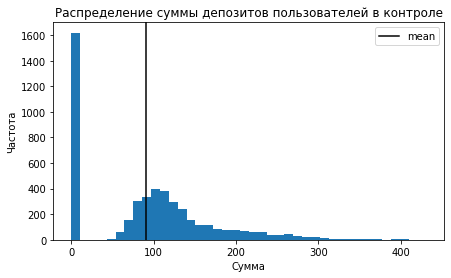

In [66]:
plt.figure(figsize=(7,4))
plt.hist(control.amount, bins=40)
plt.axvline(x=mean_deposit_amount_ab['control'], color='black', label='mean')

plt.title('Распределение суммы депозитов пользователей в контроле')
plt.xlabel('Сумма')
plt.ylabel('Частота')
plt.legend()

plt.show()

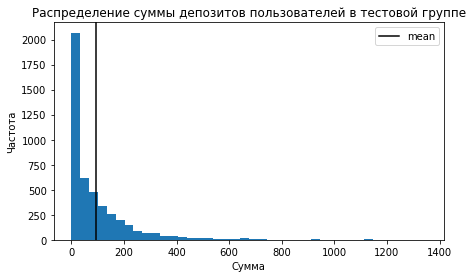

In [67]:
plt.figure(figsize=(7,4))
plt.hist(test.amount, bins=40)
plt.axvline(x=mean_deposit_amount_ab['test'], color='black', label='mean')

plt.title('Распределение суммы депозитов пользователей в тестовой группе')
plt.xlabel('Сумма')
plt.ylabel('Частота')
plt.legend()

plt.show()

In [68]:
_, p_levene = stats.levene(test.amount, control.amount)

p_levene < 0.05

True

In [69]:
all_users_amounts.amount.describe()

count    9415.000000
mean       91.317578
std       110.841198
min         0.000000
25%         0.000000
50%        77.000000
75%       131.000000
max      1350.000000
Name: amount, dtype: float64

In [70]:
_, p_value = stats.ttest_ind(test.amount, control.amount, equal_var=False)

p_value

0.33829488891764226

In [71]:
p_95 = np.percentile(all_users_amounts.amount, 95)

all_users_amounts_filtered = all_users_amounts[all_users_amounts.amount < p_95]

test_fil = all_users_amounts[all_users_amounts.group == 'test']
control_fil = all_users_amounts[all_users_amounts.group == 'control']

In [72]:
all_users_amounts_filtered.amount.describe()

count    8944.000000
mean       73.928444
std        72.707839
min         0.000000
25%         0.000000
50%        70.000000
75%       121.000000
max       275.000000
Name: amount, dtype: float64

In [73]:
all_users_amounts_filtered.groupby('group').amount.mean()

group
control    85.059519
test       61.389444
Name: amount, dtype: float64

In [74]:
_, p_value_fil = stats.ttest_ind(test_fil.amount, control_fil.amount, equal_var=False)

p_value_fil

0.33829488891764226

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Тест проведен верно👍

</div>


Для ключевой метрики также изучите:
- накопленную динамику изменения по дням эксперимента для каждой группы,
- стабильность p-value во время эксперимента.

In [75]:
dates = sorted(ab.first_dt.dt.date.unique())

In [76]:
records = []

for current_date in dates:
    users_to_date = ab[ab.first_dt.dt.date <= current_date][['user_id', 'group']].drop_duplicates()

    total_users = users_to_date.groupby('group').user_id.nunique().reset_index(name='total_users')

    curr_deposits = ab[
        (ab.event_name.isin(['first_deposit', 'second_deposit'])
        ) & (
        ab.event_ts.dt.date <= current_date)]

    total_deposit_amount = curr_deposits.groupby('group').amount.sum().reset_index(name='total_amount')

    merged = pd.merge(total_users, total_deposit_amount, on='group', how='left')
    merged['total_amount'] = merged.total_amount.fillna(0)

    merged['deposit_per_user_avg'] = merged.total_amount / merged.total_users
    merged['date'] = current_date
    
    records.append(merged)
    

cumul = pd.concat(records)


cumul_test = cumul[cumul.group == 'test']
cumul_control = cumul[cumul.group == 'control']

cumul_test.head()


,group,total_users,total_amount,deposit_per_user_avg,date
1,test,360,63.0,0.175000,2025-06-02
1,test,685,10640.0,15.532847,2025-06-03
1,test,1008,32980.0,32.718254,2025-06-04
1,test,1343,55564.0,41.373045,2025-06-05
1,test,1678,81138.0,48.353993,2025-06-06


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Ты считаешь сумму депозитов по группе и делишь её на общее число всех пользователей группы, включая тех, кто вообще не делал депозитов. Из-за этого среднее получается заниженным и нелогичным.

Правильно — сначала посчитать накопленные суммы по каждому пользователю, а уже потом брать среднее по пользователям внутри группы.

</div>


<div class="alert alert-block alert-info">
    
В трактовке этого задания я с Вами не могу согласиться. В задаче однозначно установлен критерий попаданий данных в выборку сумм депозитов: "Ключевая метрика — средняя сумма всех депозитов на одного пользователя (__включая тех, кто установил приложение или открыл веб-версию__)." Поэтому нормально, что в данные попадают и такие пользователи, которые не открывали депозитов после знакомства с сервисом.
    
</div>

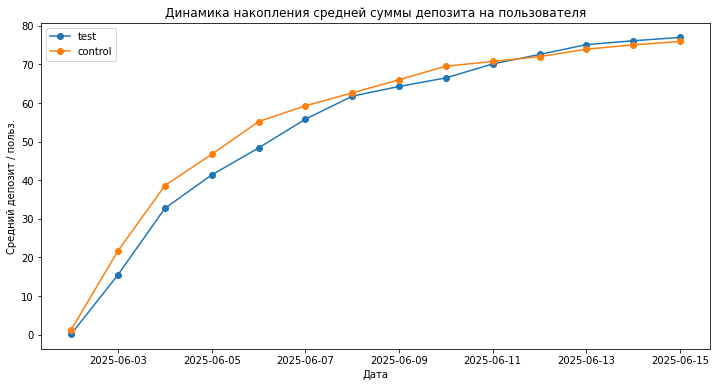

In [77]:
plt.figure(figsize=(12,6))

plt.plot(cumul_test.date, cumul_test.deposit_per_user_avg, label='test', marker='o')
plt.plot(cumul_control.date, cumul_control.deposit_per_user_avg, label='control', marker='o')

plt.title('Динамика накопления средней суммы депозита на пользователя')
plt.xlabel('Дата')
plt.ylabel('Средний депозит / польз.')
plt.legend()

plt.show()

In [119]:
results = []


for curr_date in dates:
    
    events_to_date = ab[ab.event_ts.dt.date <= curr_date][['user_id', 'group', 'event_name', 'amount']].drop_duplicates()
    
    ab_amount = events_to_date[events_to_date.event_name.isin(['first_deposit', 'second_deposit'])
              ].groupby(['group', 'user_id']).amount.sum().reset_index()
    
    #all_users_amounts = pd.merge(users_to_date, ab_amount, how='left', on=['group', 'user_id'])

    ab_amount.amount = ab_amount.amount.fillna(0)

    test = ab_amount[ab_amount.group == 'test']
    control = ab_amount[ab_amount.group == 'control']

    _, p_value = stats.ttest_ind(test.amount, control.amount, equal_var=False)
    
    results.append({
        'date': curr_date,
        'p_value': p_value
    })
    

p_dynamic = pd.DataFrame(results)
   
    
p_dynamic.head()

/tmp/ipykernel_48/1556684883.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_value = stats.ttest_ind(test.amount, control.amount, equal_var=False)
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,date,p_value
0,2025-06-02,NaN
1,2025-06-03,0.000214
2,2025-06-04,0.000060
3,2025-06-05,0.000337
4,2025-06-06,0.002522


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   ChatGPT сказал:

Ты считаешь сумму депозитов каждого пользователя за весь период сразу и используешь эти неизменные данные для всех дат. Поэтому t-тест каждый день запускается на одном и том же наборе значений.

Чтобы получить корректную динамику p-value, нужно на каждую дату пересчитывать накопленные суммы депозитов только до этой даты, а затем проводить t-тест на этих кумулятивных данных.

</div>


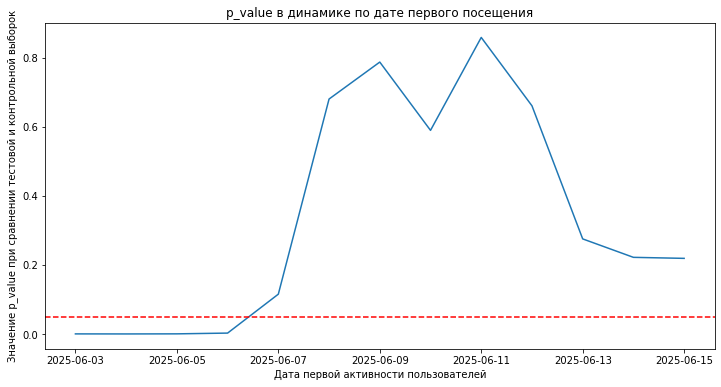

In [121]:
plt.figure(figsize=(12,6))

plt.plot(p_dynamic.date, p_dynamic.p_value)

plt.title('p_value в динамике по дате первого посещения')
plt.xlabel('Дата первой активности пользователей')
plt.ylabel('Значение p_value при сравнении тестовой и контрольной выборок')
plt.axhline(y=0.05, color='red', linestyle='--')

plt.show()

В тестовой группе повысилась средняя сумма депозитов на пользователя по сравнению с контролем (90 у.е. против 92 у.е.). При этом изменения не показали статистической значимости.

И в тесте, и в контроле, по-преждему преобладают нулевые суммы депозитов, хотя в контроле их меньше. Наблюдался выраженный правый хвост среди сумм депозитов, поэтому произведена фильтрация данных по 95 процентилю, чтобы снизить вклад выбросов. После фильтрации метрика позаказа значение в контроле 85 у.е., в тесте 61 у.е.. Даже с учетом этого статистической значимости изменений не найдено. 

В начале эксперимента значение p_value показывало ложноположительный результат, затем по мере накопления данных возрасло дл 0.8, к концу периода наблюдения снизилось до 0.2. Можно предположить, что период наблюдения был недостаточен для накопления данных для значимости результата.

Из графика кумулятивной суммы депозита на пользователя видно, что накопление происходило логарифмически, схоже у тестовой и контрольной группы. При этом скорее всего к концу ab-теста значение еще не до конца вышло на плато.

##### Барьерная метрика — конверсия из регистрации в первый депозит

In [80]:
ab.event_name.unique()

array(['install / open_web', 'introduction', 'registration', 'main_page',
       'onboarding_complete', 'first_deposit', 'asset_purchase',
       'second_deposit'], dtype=object)

In [81]:
ab_conv_reg_first = ab[ab.event_name.isin(['registration', 'first_deposit'])
  ][['group', 'user_id', 'event_name']].drop_duplicates()

ab_conv_reg_first = ab_conv_reg_first.groupby('group').event_name.value_counts().reset_index()

display(ab_conv_reg_first)

conv_control = ab_conv_reg_first['count'].iloc[1] / ab_conv_reg_first['count'].iloc[0]

conv_test = ab_conv_reg_first['count'].iloc[3] / ab_conv_reg_first['count'].iloc[2]


print(f'''Конверсия из регистрации в первый депозит
тестовая группа: {round(conv_test, 4)}
контрольная группа: {round(conv_control, 4)}

Абсолютная разница: {round(conv_test - conv_control, 4)}
Относительная разница {round(100 * (conv_test - conv_control) / conv_control, 2)}%''')

,group,event_name,count
0,control,registration,4512
1,control,first_deposit,3228
2,test,registration,4265
3,test,first_deposit,2987


Конверсия из регистрации в первый депозит
тестовая группа: 0.7004
контрольная группа: 0.7154

Абсолютная разница: -0.0151
Относительная разница -2.11%


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Барьерная рассчитана верно👍

</div>


In [82]:
control_reg = ab_conv_reg_first['count'].iloc[0]
control_first_dep = ab_conv_reg_first['count'].iloc[1]

test_reg = ab_conv_reg_first['count'].iloc[2]
test_first_dep = ab_conv_reg_first['count'].iloc[3]

table = [
    [control_first_dep, control_reg - control_first_dep],
    [test_first_dep, test_reg - test_first_dep]
]

_, p_value, _, expected = stats.chi2_contingency(table)


anw = ['не', '']
print(f'''Конверсия из регистрации в первый депозит в тестовой группе 
от контроля статистически значимо {anw[int(p_value < 0.05)]} отличается (метод Хи-квадрат).

p_value = {p_value.round(4)}''')

Конверсия из регистрации в первый депозит в тестовой группе 
от контроля статистически значимо не отличается (метод Хи-квадрат).

p_value = 0.1263


In [133]:
control_reg = ab_conv_reg_first['count'].iloc[0]
control_first_dep = ab_conv_reg_first['count'].iloc[1]

test_reg = ab_conv_reg_first['count'].iloc[2]
test_first_dep = ab_conv_reg_first['count'].iloc[3]

stat, p_value = proportions_ztest([control_first_dep, test_first_dep], [control_reg, test_reg], alternative='larger')
anw = ['не', '']
print(f'''Конверсия из регистрации в первый депозит в тестовой группе 
от контроля статистически значимо {anw[int(p_value < 0.05)]} отличается (Z-тест пропорций).

p_value = {p_value:.4f}''')


Конверсия из регистрации в первый депозит в тестовой группе 
от контроля статистически значимо не отличается (Z-тест пропорций).

p_value = 0.0603


Новая методика онбординга не повлияла статистически значимо на конверсию из регистрации в первый депозит.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь, опять же, мы сравниваем конверсии - поэтому стоит использовать Z-тест, как оптимальный

</div>


##### Вспомогательная метрика 1 – Конверсия из первого депозита во второй

In [83]:
ab_conv_first_sec = ab[ab.event_name.isin(['second_deposit', 'first_deposit'])
  ][['group', 'user_id', 'event_name']].drop_duplicates()

ab_conv_first_sec = ab_conv_first_sec.groupby('group').event_name.value_counts().reset_index()

display(ab_conv_first_sec)

conv_1_test = ab_conv_first_sec['count'].iloc[3] / ab_conv_first_sec['count'].iloc[2]

conv_1_control = ab_conv_first_sec['count'].iloc[1] / ab_conv_first_sec['count'].iloc[0]


print(f'''Конверсия из первого депозита во второй
тестовая группа: {round(conv_1_test, 4)}
контрольная группа: {round(conv_1_control, 4)}

Абсолютная разница: {round(conv_1_test - conv_1_control, 4)}
Относительная разница {round(100 * (conv_1_test - conv_1_control) / conv_1_control, 2)}%''')

,group,event_name,count
0,control,first_deposit,3228
1,control,second_deposit,654
2,test,first_deposit,2987
3,test,second_deposit,974


Конверсия из первого депозита во второй
тестовая группа: 0.3261
контрольная группа: 0.2026

Абсолютная разница: 0.1235
Относительная разница 60.95%


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Метрика рассчитана верно👍

</div>


In [139]:
control_first = ab_conv_first_sec['count'].iloc[0]
control_second = ab_conv_first_sec['count'].iloc[1]

test_first = ab_conv_first_sec['count'].iloc[2]
test_second = ab_conv_first_sec['count'].iloc[3]

stat, p_value = proportions_ztest([control_second, test_second], [control_first, test_first], alternative='smaller')

anw = ['не ', '']
print(f'''Конверсия из первого депозита во второй в тестовой группе 
от контроля статистически значимо {anw[int(p_value < 0.05)]}отличается (Z-тест пропорций).

p_value = {p_value:.4f}''')


Конверсия из первого депозита во второй в тестовой группе 
от контроля статистически значимо отличается (Z-тест пропорций).

p_value = 0.0000


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Тут нужно провести Z-тест, так как проверяем конверсии

</div>


Благодаря углубленному онбордингу в тестовой группе повысилась на 12 процентных пунктов (относ. измен. 60%) конверсия из первого депозита во второй, что может говорить о большей удовлетворенности пользователей опытом первого депозита.

##### Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит

In [85]:
depos = ab[ab.event_name.isin(['first_deposit', 'second_deposit'])]

avg_depos = depos.groupby('group').agg({'amount': 'sum', 'user_id': 'nunique'})
avg_depos['conv'] = avg_depos.amount / avg_depos.user_id

avg_depos

,amount,user_id,conv
group,,,
control,437394.0,3228,135.500000
test,422361.0,2987,141.399732


In [86]:
print(f'''Средняя сумма депозитов среди пользователей, открывших хотя бы один депозит
тестовая группа: {round(avg_depos.loc['test'].conv, 4)}
контрольная группа: {round(avg_depos.loc['control'].conv, 4)}

Абсолютная разница: {round(avg_depos.loc['test'].conv - avg_depos.loc['control'].conv, 4)}
Относительная разница {round(100 * (avg_depos.loc['test'].conv - avg_depos.loc['control'].conv) / avg_depos.loc['control'].conv, 2)}%''')

Средняя сумма депозитов среди пользователей, открывших хотя бы один депозит
тестовая группа: 141.3997
контрольная группа: 135.5

Абсолютная разница: 5.8997
Относительная разница 4.35%


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Метрика рассчитана верно👍

</div>


In [87]:
depos_sum = depos.groupby(['group', 'user_id']).amount.sum().reset_index()

control_amounts = depos_sum[depos_sum.group == 'control'].amount
test_amounts = depos_sum[depos_sum.group == 'test'].amount

_, p_value = stats.ttest_ind(test_amounts, control_amounts, equal_var=False)

anw = ['не ', '']
print(f'''Средняя сумма депозитов среди пользователей, открывших хотя бы один депозит в тестовой группе 
от контроля статистически значимо {anw[int(p_value < 0.05)]}отличается (t-тест Уэлча).

p_value = {p_value}''')

Средняя сумма депозитов среди пользователей, открывших хотя бы один депозит в тестовой группе 
от контроля статистически значимо отличается (t-тест Уэлча).

p_value = 0.040038687957718415


Новый онбординг статистически значимо повысил среднюю сумму депозита среди тех пользователей, которые открыли хотя бы один депозит. Вероятно пользователи тестовой группы стали больше морально готовы к вложениям в активы, обладая углубленными знаниями по сравнению с контролем. В том числе это может быть связано с большей конверсией в открытие второго депозита.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Тест проведен верно👍

</div>


---

### 4. Анализ изменений суммы депозитов на платящего пользователя

Новая фича могла повлиять на поведение пользователей.
- Пользователи, которые раньше вносили небольшие суммы, могли стать более осторожными, сократить свои вложения или совсем перестать платить. Это отразится в снижении 25-го перцентиля суммы депозитов в тестовой группе.
- Пользователи, которые склонны к более крупным инвестициям, могли сильнее вовлечься в продукт и начать вносить больше средств. Это отразится в росте 75-го перцентиля.

Используя бутстрап, сравните разницы перцентилей (25, 50, 75) суммы всех депозитов на платящего пользователя в контрольной и тестовой группах:
- Постройте доверительные интервалы для разницы между группами для каждого перцентиля.
- Интерпретируйте изменения в контексте сформулированной выше гипотезы.
- Визуализируйте результат бутстрап-теста. 

<details>
<summary>Подсказка</summary>

В уроках вы использовали бутстрап, чтобы сравнивать средние значения двух групп. Вы визуализировали распределение разностей, рассчитывали доверительный интервал и делали выводы об эффекте изменений. В проекте вместо средних проанализируйте разницу значений 25, 50 и 75 перцентилей в тестовой и контрольной группах А/В-эксперимента.

Для этого постройте 95%-й доверительный интервал. Можете использовать пример ниже:


```python
# Пример бутстрап-теста
import numpy as np

# Фиксируем сид для воспроизводимости
np.random.seed(341)

# Для примера генерируем экспоненциальные данные: контроль и тест по 1000 наблюдений 
# со средними значениями 2.2 и 1.7
control = np.random.exponential(scale=2.2, size=1000)
test = np.random.exponential(scale=1.7, size=1000)

n_iterations = 1000
boot_diffs = []

# Бутстрап-разница 95-х перцентилей между тестовой и контрольной группами
for i in range(n_iterations):
    boot_control = np.random.choice(control, size=len(control), replace=True)
    boot_test = np.random.choice(test, size=len(test), replace=True)

    # Для расчёта 95 перцентиля используем .percentile() из библиотеки numpy 
    control_95p = np.percentile(boot_control, 95)
    test_95p = np.percentile(boot_test, 95)

    # Находим разницу между значениями тестовой и контрольной групп
    boot_diffs.append(test_95p - control_95p)

# Создаём массив разниц между 95-ми перцентилями тестовой и контрольной групп
boot_diffs = np.array(boot_diffs)

# Доверительный интервал разницы между 95-ми перцентилями (перцентильный метод)
diff_ci = np.percentile(boot_diffs, [2.5, 97.5])

# Вывод доверительного интервала
print(f"95-й перцентиль контрольной группы: {np.percentile(control, 95):.2f}")
print(f"95-й перцентиль тестовой группы: {np.percentile(test, 95):.2f}")
print(f"95%-й доверительный интервал разности 95-х перцентилей [{diff_ci[0]:.2f}, {diff_ci[1]:.2f}]")

```

</details>


In [88]:
np.random.seed(1)
percentiles = [25, 50, 75]

results = {}

for per in percentiles:
    
    boot_diffs = []
    for _ in range(1000):
        boot_control = np.random.choice(control_amounts, size=len(control_amounts), replace=True)
        boot_test = np.random.choice(test_amounts, size=len(test_amounts), replace=True)

        control_p = np.percentile(boot_control, per)
        test_p = np.percentile(boot_test, per)

        boot_diffs.append(test_p - control_p)

    boot_diffs = np.array(boot_diffs)

    # Сохраняем!
    results[per] = boot_diffs

    diff_ci = np.percentile(boot_diffs, [2.5, 97.5])

    print(f"{per}-й перцентиль контрольной группы: {np.percentile(control_amounts, per):.2f}")
    print(f"{per}-й перцентиль тестовой группы: {np.percentile(test_amounts, per):.2f}")
    print(f"95%-й доверительный интервал разности {per}-х перцентилей "
          f"[{diff_ci[0]:.2f}, {diff_ci[1]:.2f}]\n")


25-й перцентиль контрольной группы: 95.00
25-й перцентиль тестовой группы: 48.00
95%-й доверительный интервал разности 25-х перцентилей [-50.00, -44.00]

50-й перцентиль контрольной группы: 118.00
50-й перцентиль тестовой группы: 94.00
95%-й доверительный интервал разности 50-х перцентилей [-27.00, -19.00]

75-й перцентиль контрольной группы: 159.00
75-й перцентиль тестовой группы: 179.50
95%-й доверительный интервал разности 75-х перцентилей [11.00, 30.00]



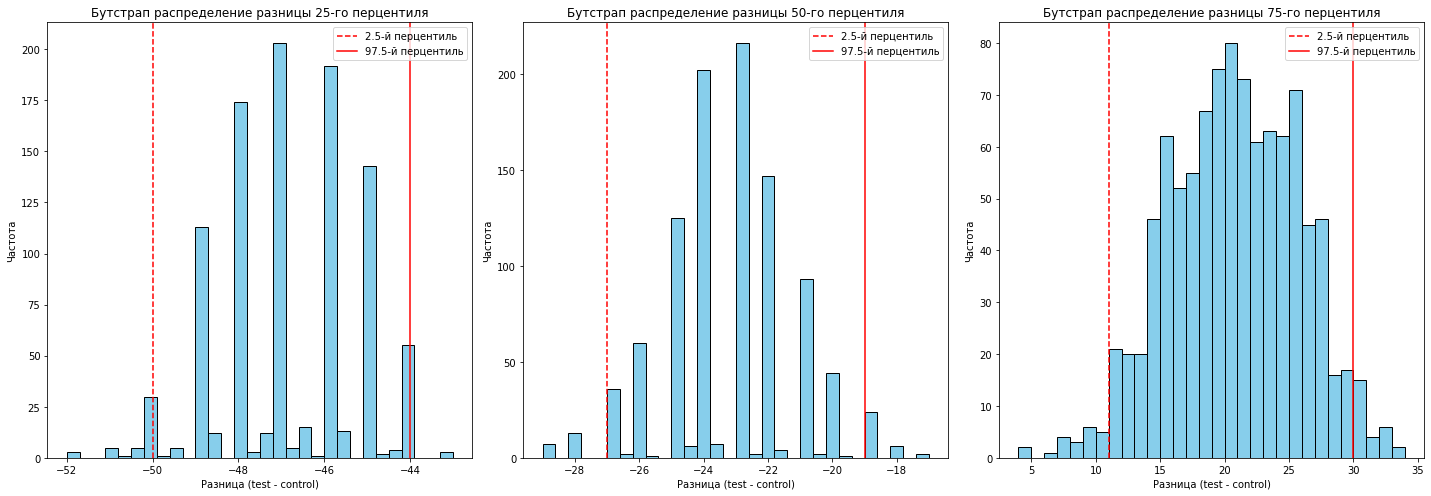

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for ax, per in zip(axes, percentiles):
    diffs = results[per]
    ax.hist(diffs, bins=30, color='skyblue', edgecolor='black')
    ax.axvline(np.percentile(diffs, 2.5), linestyle='--', label='2.5-й перцентиль', color='red')
    ax.axvline(np.percentile(diffs, 97.5), linestyle='-', label='97.5-й перцентиль', color='red')
    ax.set_title(f"Бутстрап распределение разницы {per}-го перцентиля")
    ax.set_xlabel("Разница (test - control)")
    ax.set_ylabel("Частота")
    ax.legend()

plt.tight_layout()
plt.show()

Для исследуемых процентилей разница между контролем и тестом сгенерированных методом бутстрап выборок попадает в доверительные интервалы.

В тестовой группе 25 процентиль ниже, чем в контрольной, что говорит о меньших вложениях и снижении активности пользователей с небольшими депозитами — они действительно стали более настороженными.

Медиана также сдвинулась в сторону меньшего значения по сравнению с контролем. Пользователи средней платежеспособности также стали вкладываться в активы меньше.

Для 75 процентиля доверительный интервал полностью положительный, что говорит о том, что крупные депозиторы стали платить больше.
Это подтверждает вторую гипотезу: самые платежеспособные пользователи стали повысили вовлеченность и увеличили суммы депозитов,

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Действительно, результат показывает что изменения в перцентилях статистически значимы, и подтверждает уменьшение мелких инвесторов и рост крупных в тестовой группе. 👍

</div>


---

### 5. Выводы

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты, которые, на ваш взгляд, помогут бизнесу улучшить продукт. Опишите, как новая фича повлияла на продукт: подтвердилась ли гипотеза, что делать дальше и есть ли риски. Объясните, какие результаты значимы и почему. 

Вывод предназначен для вашего заказчика и менеджеров продукта, поэтому сделайте его кратким, содержательным и понятным. 

Новая система углублённого онбординга изменила поведение пользователей, но неравномерно. 

По ключевой метрике — средней сумме депозитов на платящего пользователя — заметного и статистически значимого эффекта не выявлено. Динамика p_value для этой метрики не стабильна, а накопленная сумма депозитов не до конца вышла на плато. Возможно для выявления разницы не хватило времени или данных – для оценки этого предположения нужно провести дополнительный анализ чувствительности и дизайна эксперимента.

Верхние этапы воронки (регистрация и первый депозит) также не изменились, что говорит об отсутвиии багов в интерфейсе при запуске нового онбординга.

Основные отличия проявились в поведении уже платящих пользователей. **Конверсия из первого депозита во второй статистически значимо выросла.** Это соответсвует исходной гипотезе номер 1 о снижении негативного опыта с первым депозитом среди неподготовленных пользователей. Статистически значимый рост конверсии из первого депозита во второй произошел и в разрезе уровня рисков активов – среди тех, кто в первый раз покупал рискованные и безопасные активы. **Дополнительная гипотеза подтвердилась.**

**Гипотеза 2 о том, что конверсия из регистрации в первый депозит снизится, НЕ подтвердилась** – статистически значимой разницы между тестом и конверсией не найдено.

Анализ распределения сумм депозитов показал неоднозначный эффект: пользователи с небольшими депозитами стали платить меньше, а крупные плательщики — больше. 

Таким образом, новый онбординг повышает вовлечённость платящих пользователей, но снижает вовлеченность части пользователей, которые остерегаются делать вложения в активы. Это создаёт потенциал роста дохода за счёт крупных плательщиков, но и вводит в зависимость от этого сегмента. 

Рекомендуется не внедрять фичу полностью, а протестировать адаптивный подход — показывать углублённый онбординг только тем сегментам, на которые он влияет потенциально положительно. Также рекомендуется дополнительно оценить долгосрочный эффект на удержание и LTV. С точки зрения развития продукта возможен положительный эффект от дополнительной системы повышения знаний инвесторов, например с помощью платного или бесплатного продукта наподобие блога/журнала с информацией от опытных игроков биржи.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Виктория, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>
